🔍 Step 1: Load dataset

In [ ]:
import json # for dealing with Json files
import pandas as pd # for dealing with dataset
import csv # used to wirte the data in CVS file

Convert Json data to CVS file

In [ ]:
# The pass to the Json dataset (old)
input_file = 'labeled_validation_dataset.jsonl'
# The pass to the CSV dataset (new)
output_file = 'labeled_validation_dataset.csv'

# Read from the Json file and write in the CSV file
with open(input_file, 'r', encoding='utf-8') as input, open(output_file, 'w', encoding='utf-8', newline='') as output:
    # Write the rows in csv
    writer = csv.writer(output)
    # Create column names
    writer.writerow(['paragraph', 'summary'])

    # Loop on the input file and copy his content into output file
    for line in input:
        # Load the lines from Json data
        data = json.loads(line)
        # Copy the data
        paragraph = data['paragraph']
        summary = data['summary']

        # Write the extracted data to the output file
        writer.writerow([paragraph, summary])


load csv file

In [ ]:
# Read the new dataset that we was created in the above
reviews = pd.read_csv('/content/labeled_validation_dataset.csv')
# display the dataset
reviews.head()

,paragraph,summary
0,وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...
1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...
2,قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...
3,دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...
4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...


# 📑 Step 2: Exploratory Data Analysis (EDA)

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   paragraph  154 non-null    object
 1   summary    154 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [ ]:
reviews.shape

(154, 2)

### Number of tokens in a text
> split text to tokens

    - applies the split() method to each element in the 'text' column.
    - It splits the text into a list of tokens,

> mapping lambda function

    - applies the map() method for each token in the text,
    - it calculates the length of the token using len(i)

> final result

    - dataset_train['no_tokens']= stores the lengths of the words for each text.

create column from number of tokens paragraph

In [ ]:
reviews['tokens_paragraph']= reviews['paragraph'].str.split().map(lambda token: len(token))
reviews.sample(10)

,paragraph,summary,tokens_paragraph
93,فلما ملك المستنصر سنة 427 ه أصبح الجند طائفتين...,عندما تولى المستنصر الحكم أصبح الجند طائفتين، ...,385
41,أما بخصوص التنظيم والممارسات الإدارية المحلية ...,جعل الإمبراطور أغسطس مصر أشبه بضيعة خاصة به حت...,301
152,ولم تقتصر مقومات بورسعيد كمدينة عالمية منذ نشأ...,امتدت بورسعيد لكي تشمل الطابع الثقافي للمدينة،...,356
97,ليس هناك اتفاق بين الباحثين عن مبدأ قيام هذه ا...,"اختلف الباحثون حول بداية قيام هذه المملكة, لكن...",293
123,وفي شهر أغسطس عام 1939 م قدمت وزارة محمد محمود...,وزارة محمد باشا قدمت استقالتها للملك فاروق، وك...,383
103,قامت مصر بمنع السفن الاسرائيلية من أستخدام قنا...,منعت مصر اسرائيل من الملاحة في القناة وتصاعدت ...,384
83,عشية انهيار السلطنة العثمانية ، كانت الثورة ال...,بعد طرد الأتراك، أظهرت الثورة الرغبة بالتخلص م...,330
8,وكان للبطل محمد علي فهمي بعض العمليات الهامة ق...,كان للبطل محمد علي فهمي بعض العمليات المهمة ال...,374
17,لم تكن تلك هي المرة الأولى التي تتعرض فيها صقل...,منذ فجر التاريخ وهى تداعب أنظار الغزاة فهى الج...,349
29,وكانت السياسة التركية مترددة غير مستقرة ، ترقب...,كانت سياسة تركيا هشة تراقب مصر ثم تصدر القرار ...,303


visualize tokens paragraph as histogram

In [ ]:
import matplotlib.pyplot as plt # make visualization
import seaborn as sns # make visualization

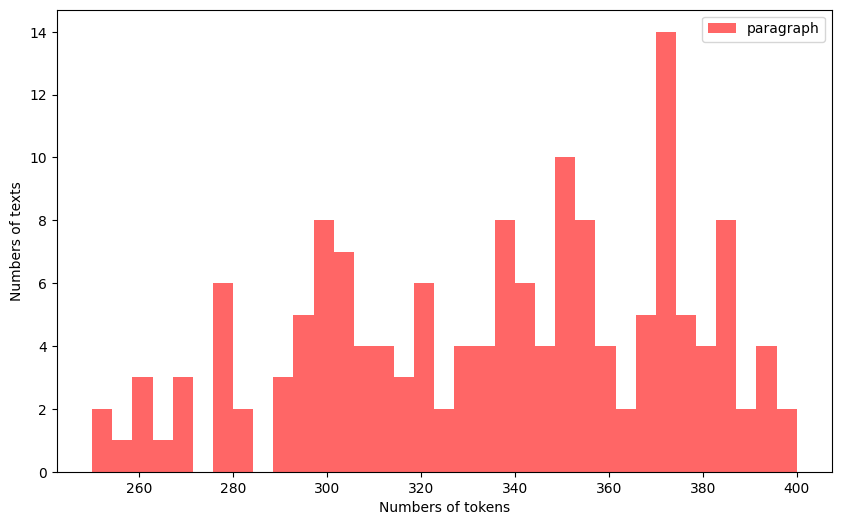

In [ ]:
plt.figure(figsize=(10, 6))

reviews['tokens_paragraph'].plot(bins=35,
                            kind='hist',
                            color='red',
                            label='paragraph',
                            alpha=0.6)

plt.legend(loc='upper right')
plt.xlabel("Numbers of tokens")
plt.ylabel("Numbers of texts")
plt.show()

max tokens

In [ ]:
max_tokens= reviews['tokens_paragraph'].max()
max_tokens

400

show max tokens

In [ ]:
reviews[reviews['tokens_paragraph'] == max_tokens]['paragraph']

116    وبعد أن قامت حكومة الوفد بإلغاء معاهدة عام 193...
Name: paragraph, dtype: object

# Step 3: Translate pharagraph & Summary


In [ ]:
!pip install mtranslate

  Preparing metadata (setup.py) ... done
  Created wheel for mtranslate: filename=mtranslate-1.8-py3-none-any.whl size=3671 sha256=39761f235d49e59b7393d4234df7a166ab1b6fc5c2984a476b033e14a1c65294
  Stored in directory: /root/.cache/pip/wheels/c2/04/15/d7654c2c4a9a52e09922967593f3278fed66059be65ca671ea
Successfully built mtranslate


In [ ]:
# Use Microsoft edge
from mtranslate import translate

# Arabic-to-English Translation
def translate_ar_to_en(text):
    translated_text = translate(text, "en", "ar")
    return translated_text

# English-to-Arabic Translation
def translate_en_to_ar(text):
    translated_text = translate(text, "ar", "en")
    return translated_text

In [ ]:
x = translate_ar_to_en('مرحبا بكم انا احمد خطاب طالب في الجامعه الروسيه بمصر')
print(x)

Hello, I am Ahmed Khattab, a student at the Russian University in Egypt


In [ ]:
y = translate_en_to_ar(x)
print(y)

مرحباً ، أنا أحمد خطاب طالب في الجامعة الروسية في مصر


# Translate the input_text to English

In [ ]:
arabic_translation_list = []
i = 0
for text in reviews['paragraph']:
    english_text = text
    arabic_translation = translate_ar_to_en(english_text)
    arabic_translation_list.append(arabic_translation)
    print(i,end=' - ')
    i+=1

reviews['translated_input'] = arabic_translation_list
print('Done')

0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 - 101 - 102 - 103 - 104 - 105 - 106 - 107 - 108 - 109 - 110 - 111 - 112 - 113 - 114 - 115 - 116 - 117 - 118 - 119 - 120 - 121 - 122 - 123 - 124 - 125 - 126 - 127 - 128 - 129 - 130 - 131 - 132 - 133 - 134 - 135 - 136 - 137 - 138 - 139 - 140 - 141 - 142 - 143 - 144 - 145 - 146 - 147 - 148 - 149 - 150 - 151 - 152 - 153 - Done


# Translate the target_text to English

In [ ]:
arabic_translation_list = []
i = 0
for text in reviews['summary']:
    english_text = text
    arabic_translation = translate_ar_to_en(english_text)
    arabic_translation_list.append(arabic_translation)
    print(i,end=' - ')
    i+=1

reviews['translated_summary'] = arabic_translation_list
print('Done')

0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 - 101 - 102 - 103 - 104 - 105 - 106 - 107 - 108 - 109 - 110 - 111 - 112 - 113 - 114 - 115 - 116 - 117 - 118 - 119 - 120 - 121 - 122 - 123 - 124 - 125 - 126 - 127 - 128 - 129 - 130 - 131 - 132 - 133 - 134 - 135 - 136 - 137 - 138 - 139 - 140 - 141 - 142 - 143 - 144 - 145 - 146 - 147 - 148 - 149 - 150 - 151 - 152 - 153 - Done


In [ ]:
reviews = pd.read_csv('translated_dataset.csv')

In [ ]:
reviews.head()

,Unnamed: 0,paragraph,summary,tokens_paragraph,translated_input,translated_summary
0,0,وتحت عنوان من الكارثة إلى التحدى يبدأ الكاتب ع...,يبدأ الكاتب عرض الكتاب الرابع تحت عنوان من الك...,335,"Under the title From Disaster to Challenge, th...",The writer begins presenting the fourth book u...
1,1,ولم يعترف دبلوماسيو هاتين الدولتين بالعريضة ال...,دبلوماسيو الدولتين لم يعترفوا بالعريضة التي قا...,277,The diplomats of these two countries did not r...,The diplomats of the two countries did not rec...
2,2,قامت ولاية حلب بعد اعلان الجنرال الفرنسي هنري ...,أعلن غورو الانتداب الفرنسي على سوريا لكي يعاقب...,339,The Wilayat of Aleppo was established after th...,Gouraud declared the French mandate over Syria...
3,3,دولة مصر العربيه هي ليست اي دوله وليست اي شعب ...,مصر هي أم البلاد، وقائدة العرب؛ فهي أرض بلاد ا...,282,The Arab state of Egypt is not any country and...,"Egypt is the mother of the country, and the le..."
4,4,السوريون يصرون على استقلال بلادهم : و مثلما رف...,الشعب السوري يصر على استقلال بلدهم من السيطرة ...,259,The Syrians insist on the independence of thei...,The Syrian people insist on the independence o...


# Step 4: Load the Pretrained Transformer Model (mT5) on GPU

In [ ]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 33.2 MB/s eta 0:00:00


In [ ]:
pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.1 MB/s eta 0:00:00


# Change the names in the data to English names

In [ ]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.1 MB/s eta 0:00:00


In [ ]:
# Download and install the large English model
import spacy
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import re
import spacy
from faker import Faker



def generate_one_syllable_name(fake):
    while True:
        name = fake.first_name()
        if len(name.split('-')) == 1:  # Check if the name has one syllable
            return name


def replace_names(sentence):
    nlp = spacy.load('en_core_web_lg')
    doc = nlp(sentence)
    name_replacements = {}
    fake = Faker()

    for ent in doc.ents:
        if ent.label_ in ['PERSON','GPE'] and not any(token.pos_ == 'NUM' for token in ent):
            name = ent.text
            if name not in name_replacements:
                replacement = generate_one_syllable_name(fake)
                sentence = re.sub(r'\b' + re.escape(name) + r'\b', replacement, sentence)
                name_replacements[name] = replacement

    return sentence, name_replacements





In [ ]:
en_names_dataset = []
i=0
for _, row in reviews.iterrows():
    target_text = row['translated_summary']
    input_text = row['translated_input']


    # Replace names in target text
    replaced_target_text, replacements_t = replace_names(target_text)

    # Replace names in input text
    replaced_input_text, replacements_i = replace_names(input_text)
    i+=1
    print(i,end=' - ')

    # Save modified data
    en_names_dataset.append({
        'translated_summary': replaced_target_text,
        'translated_input': replaced_input_text,
        'input_english_names': replacements_i,
        'target_english_names': replacements_t,

    })

# Create a new DataFrame with modified data
en_names_dataset = pd.DataFrame(en_names_dataset)

# Save the modified DataFrame to a new CSV file
en_names_dataset.to_csv('en_names_dataset.csv', index=False)


1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 - 101 - 102 - 103 - 104 - 105 - 106 - 107 - 108 - 109 - 110 - 111 - 112 - 113 - 114 - 115 - 116 - 117 - 118 - 119 - 120 - 121 - 122 - 123 - 124 - 125 - 126 - 127 - 128 - 129 - 130 - 131 - 132 - 133 - 134 - 135 - 136 - 137 - 138 - 139 - 140 - 141 - 142 - 143 - 144 - 145 - 146 - 147 - 148 - 149 - 150 - 151 - 152 - 153 - 154 - 

In [ ]:
reviews = pd.read_csv('en_names_dataset.csv')
reviews.head()

,translated_summary,translated_input,input_english_names,target_english_names
0,The writer begins presenting the fourth book u...,"Under the title From Disaster to Challenge, th...","{'Israel': 'Steven', 'the United Arab Republic...","{'Israel': 'Hannah', 'Abdel Nasser': 'Brian', ..."
1,The diplomats of the two countries did not rec...,The diplomats of these two countries did not r...,"{'Allal al-Fassi': 'Brittany', 'Morocco': 'Cha...","{'Allal Al-Fassi': 'Thomas', 'Cairo': 'Karen',..."
2,Cassandra declared the French mandate over Val...,The Wilayat of Stephanie was established after...,"{'Aleppo': 'Stephanie', 'Henri Gouraud': 'Aaro...","{'Gouraud': 'Cassandra', 'Syria': 'Valerie', '..."
3,"Monique is the mother of the country, and the ...",The Arab state of Emily is not any country and...,"{'Egypt': 'Emily', 'Morocco': 'Zachary', 'Hosn...","{'Egypt': 'Monique', 'Hosni Mubarak': 'Amy', '..."
4,The Syrian people insist on the independence o...,The Syrians insist on the independence of thei...,"{'Sultan Pasha al-Atrash': 'Elizabeth', 'Jabal...",{'Syria': 'Kevin'}


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import Trainer, TrainingArguments

# T5 model
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config




In [ ]:
# Define your custom dataset
class CustomDataset(Dataset):
    def __init__(self, tokenizer, data):
        self.tokenizer = tokenizer
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        input_text = str(self.data.loc[index, "translated_input"])
        target_text = str(self.data.loc[index, "translated_summary"])

        encoding = self.tokenizer.prepare_seq2seq_batch(
            src_texts=[input_text],
            tgt_texts=[target_text],
            max_length=512,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        return {
            "input_ids": encoding.input_ids.squeeze(),
            "attention_mask": encoding.attention_mask.squeeze(),
            "labels": encoding.labels.squeeze()
        }

In [ ]:
# Initialize the T5 tokenizer and model
# T5
tokenizer = T5Tokenizer.from_pretrained("t5-base")
model = T5ForConditionalGeneration.from_pretrained("t5-base")




/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
# Create your training dataset
train_dataset = CustomDataset(tokenizer, reviews)

# Set up the training arguments
training_args = TrainingArguments(
    output_dir="./",
    num_train_epochs=130,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=9,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,

)

# Initialize the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    data_collator=None
)

# Start training
trainer.train()

# Save the trained model
output_dir = "model_summary_arabic"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)


Step,Training Loss
100,0.531300
200,0.580900
300,0.508900
400,0.476700
500,0.416500
600,0.387400
700,0.348700
800,0.315200
900,0.292700
1000,0.260400


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3745: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3619: UserWarning: `as_target_tokenizer` is depr

Step,Training Loss
100,0.531300
200,0.580900
300,0.508900
400,0.476700
500,0.416500
600,0.387400
700,0.348700
800,0.315200
900,0.292700
1000,0.260400


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3745: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3619: UserWarning: `as_target_tokenizer` is depr

('model_summary_arabic/tokenizer_config.json',
 'model_summary_arabic/special_tokens_map.json',
 'model_summary_arabic/spiece.model',
 'model_summary_arabic/added_tokens.json')

# Step 5: Load the model for inference (Predict)

In [ ]:
reviews.head()

,translated_summary,translated_input,input_english_names,target_english_names
0,The writer begins presenting the fourth book u...,"Under the title From Disaster to Challenge, th...","{'Israel': 'Steven', 'the United Arab Republic...","{'Israel': 'Hannah', 'Abdel Nasser': 'Brian', ..."
1,The diplomats of the two countries did not rec...,The diplomats of these two countries did not r...,"{'Allal al-Fassi': 'Brittany', 'Morocco': 'Cha...","{'Allal Al-Fassi': 'Thomas', 'Cairo': 'Karen',..."
2,Cassandra declared the French mandate over Val...,The Wilayat of Stephanie was established after...,"{'Aleppo': 'Stephanie', 'Henri Gouraud': 'Aaro...","{'Gouraud': 'Cassandra', 'Syria': 'Valerie', '..."
3,"Monique is the mother of the country, and the ...",The Arab state of Emily is not any country and...,"{'Egypt': 'Emily', 'Morocco': 'Zachary', 'Hosn...","{'Egypt': 'Monique', 'Hosni Mubarak': 'Amy', '..."
4,The Syrian people insist on the independence o...,The Syrians insist on the independence of thei...,"{'Sultan Pasha al-Atrash': 'Elizabeth', 'Jabal...",{'Syria': 'Kevin'}


In [ ]:
x = reviews['translated_input'][0]

In [ ]:
# Load the trained model and tokenizer
model_dir = "model_summary_arabic"
tokenizer = T5Tokenizer.from_pretrained(model_dir)
model = T5ForConditionalGeneration.from_pretrained(model_dir)

# tokenizer = PegasusTokenizer.from_pretrained(model_dir)
# model = PegasusForConditionalGeneration.from_pretrained(model_dir)

# Set the model to evaluation mode
eval = model.eval()

# Input text
input_text = x
max_chunk_length = 400  # Maximum length for each chunk

# Tokenize and chunk the input text
input_tokens = tokenizer.tokenize(input_text)
chunked_input = []
current_chunk = []
for token in input_tokens:
    current_chunk.append(token)
    if len(current_chunk) >= max_chunk_length:
        chunked_input.append(" ".join(current_chunk))
        current_chunk = []
if current_chunk:
    chunked_input.append(" ".join(current_chunk))

# Generate summaries for each chunk
summaries = []
for chunk in chunked_input:
    input_ids = tokenizer.encode(chunk, return_tensors="pt")
    output = model.generate(input_ids, max_length=300, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(output[0], skip_special_tokens=True)
    print('summary: ',summary)
    summaries.append(summary)

# Combine the generated summaries
combined_summary = " ".join(summaries)

# Print the generated summary
print("Generated Summary:", combined_summary)

summary:  The writer begins presenting the fourth book under the title From Disaster to Challenge, where he explains how Hannah was happy with its victory in 67, and how the war of attrition began, then he talks about the death of Brian, and Rebekah took over the rule of Rebecca. He says : This day was the worst defeat in the history of the Israeli army, then he moves us to the Syrian front, then returns again to the war diaries from October 9 -7 to October 13 -9 and October 14 and October 14 and presents the breach or what was known as the American aid, then the tendency to approve the request for a cease - fire from October 17 to 20 and the final operations in the Su ez Canal from October 19 to 22 and the final operations in the Su ez Canal.
summary:  Jennifer entered the war against Robert in October 9, then the writer presents the battle for the sei zu re of the city Su ez from October 23 to October 25, then the developments of this battle, and how, by the twenty -seventh day of Oc

In [ ]:
summary = translate_en_to_ar(combined_summary)
summary

'يبدأ الكاتب في تقديم الكتاب الرابع بعنوان من كارثة إلى تحدٍ ، حيث يشرح كيف كانت حنة سعيدة بانتصارها عام 67 ، وكيف بدأت حرب الاستنزاف ، ثم تحدث عن موت بريان ، وتولت ربيكا زمام الأمور. حكم ريبيكا. يقول: هذا اليوم كان أسوأ هزيمة في تاريخ الجيش الإسرائيلي ، ثم ينقلنا إلى الجبهة السورية ، ثم يعود مرة أخرى إلى يوميات الحرب من 9 إلى 7 تشرين الأول (أكتوبر) حتى 13 تشرين الأول (أكتوبر) ، و 14 تشرين الأول (أكتوبر) و 14 تشرين الأول (أكتوبر) يعرض الخرق أو ما كان يعرف بالمساعدات الأمريكية ، ثم التوجه نحو الموافقة على طلب وقف إطلاق النار من 17 إلى 20 أكتوبر والعمليات النهائية في قناة السويس من 19 إلى 22 أكتوبر والعمليات النهائية في منطقة سو. قناة ez. دخلت جينيفر الحرب ضد روبرت في 9 أكتوبر ، ثم يعرض الكاتب معركة سي زو ري لمدينة سو إيز من 23 أكتوبر إلى 25 أكتوبر ، ثم تطورات هذه المعركة ، وكيف ، بحلول اليوم السابع والعشرين من الشهر. وكانت القوات الإسرائيلية قد أسرت في أكتوبر حوالي ثمانية آلاف عنصر من القوات المصرية ، معظمهم من وحدات الإمداد والتموين.'

In [ ]:
# Load the trained model and tokenizer
model_dir = "model_summary_arabic"
tokenizer = T5Tokenizer.from_pretrained(model_dir)
model = T5ForConditionalGeneration.from_pretrained(model_dir)

# tokenizer = PegasusTokenizer.from_pretrained(model_dir)
# model = PegasusForConditionalGeneration.from_pretrained(model_dir)


append new column for "generated_summary"

In [ ]:
# Set the model to evaluation mode
eval = model.eval()

# Input text
input_text = reviews['translated_input']

# Function to generate summaries
def generate_summary(text):
    max_chunk_length = 300  # Maximum length for each chunk
    i=0
    # Tokenize and chunk the input text
    input_tokens = tokenizer.tokenize(text)
    chunked_input = []
    current_chunk = []
    for token in input_tokens:
        current_chunk.append(token)
        if len(current_chunk) >= max_chunk_length:
            chunked_input.append(" ".join(current_chunk))
            current_chunk = []
    if current_chunk:
        chunked_input.append(" ".join(current_chunk))

    # Generate summaries for each chunk
    summaries = []
    for chunk in chunked_input:
        print(i)
        i+=1
        input_ids = tokenizer.encode(chunk, return_tensors="pt")
        output = model.generate(input_ids, max_length=300, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(output[0], skip_special_tokens=True)
        summaries.append(summary)

    # Combine the generated summaries
    combined_summary = " ".join(summaries)
    return combined_summary

# Generate column "generate summary" in the DataFrame
reviews['generated_summary'] = reviews['translated_input'].apply(generate_summary)

reviews.head()

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
2
0
1
2
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
2
0
1
0
1
2
0
1
0
1
0
1
2
0
1
0
1
2
0
1
0
1
0
1
0
1
0
1
0
1
0
1
2
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
2
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
2
0
1
2
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
2
0
1
0
1
0
1
0
1
2
0


translate generated summary in new column called "translated_generated_summary"

In [ ]:
# Function to translate the generated summaries
def translate_summary(summary):
    input_ids = tokenizer.encode(summary, return_tensors="pt")
    translated_output = model.generate(input_ids)
    translated_summary = tokenizer.decode(translated_output[0], skip_special_tokens=True)
    return translated_summary

reviews['translated_generated_summary'] = reviews['generated_summary'].apply(translate_summary)
print('Done')

# Step 6: Evaluation using ROUGE metrics
+ ROUGE: (Recall-Oriented Understudy for Gisting Evaluation)
+ used for evaluating the quality of text summarization outputs.

Initialize object from ROUGE metric

In [ ]:
!pip install rouge

In [ ]:
rouge = Rouge()

+ Prepare the references and hypotheses:
  - column [summary] is references..
      - Convert the reference summaries from the dataset into a list
  - column [generated_summary] is hypotheses..
      - Convert the generated summaries into a list

In [ ]:
references = reviews['summary'].tolist()
hypotheses = reviews['translated_generated_summary'].tolist()

- Pass hypotheses and references for method get_scores to compute the ROUGE scores:
- avg= True >> compute average scores for all the scores.

In [ ]:
scores = rouge.get_scores(hypotheses, references, avg=True)

- ROUGE-1: measures the overlap of `unigrams (single words)` between the generated summary (hypotheses) and the reference summary.

- ROUGE-2: measures the overlap of `bigrams (pairs of consecutive words)` between the generated summary (hypotheses) and the reference summary.

- ROUGE-L: measures the `longest common subsequence (LCS)` between the generated summary (hypotheses) and the reference summary.

- Precision: ratio of the number of overlapping unigrams (ROUGE-1), bigrams (ROUGE-2) or LCS (ROUGE-L) between the generated and reference summaries to the number of unigrams or bigrams or LCS in the `generated summary`.

- Recall: ratio of the number of overlapping unigrams (ROUGE-1), bigrams (ROUGE-2) or LCS (ROUGE-L) between the generated and reference summaries to the number of unigrams or bigrams or LCS in the `reference summary`.

- ROUGE-1 Score: `harmonic mean` of precision and recall.

In [ ]:
print("ROUGE-1: ", scores['rouge-1'])
print("ROUGE-2: ", scores['rouge-2'])
print("ROUGE-L: ", scores['rouge-l'])
print("Precision: ", scores['rouge-1']['p'])
print("Recall: ", scores['rouge-1']['r'])
print("ROUGE-1 Score: ", scores['rouge-1']['f'])

# Step 7: Save the model

In [ ]:
# Save the trained model
output_dir = "model_summary_arabic"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Step 8: Test
  + with test dataset !!

# Final Step:
  + create Dataframe "translated_generated_summary" has one column called "summary"
  + convert it to jsonl file called "predictions.jsonl
  + compress it to zip format which will be submitted

In [ ]:
# create DataFrame from column ""
dataset_predictions= pd.DataFrame(reviews['translated_generated_summary'])
dataset_predictions.head()

In [ ]:
# convert DataFrame to jsonl format
dataset_predictions.to_json("predictions.jsonl", lines=True, orient='records', force_ascii=False)

In [ ]:
# # Save JSON data to a file
# json_file_path = 'predictions.jsonl'
# with open(json_file_path, 'w') as json_file:
#     json_file.write(dataset_predictions)

# print("DataFrame converted to JSON and saved to", json_file_path)